In [2]:
from scipy.stats import qmc, norm, truncnorm
import numpy as np

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
mpl.rcParams.clear()
mpl.rcParams.update({

                     'font.family': 'serif',
                     'lines.linewidth': 0.5,
                     'axes.linewidth': 0.5,
                     'xtick.major.width': 0.5,
                     'ytick.major.width': 0.5
                     })

In [4]:
mean = 30 # Mean
std = 5 # Standard deviation
sample_num = 1000 # Number of samples

In [5]:
# LatinHyperCube
lhc = qmc.LatinHypercube(d=1, optimization="random-cd").random(n=sample_num)
sample_lhc = norm(loc=mean, scale=std).ppf(lhc)

# Monte Carlo (random numbers)
sample_mc = norm.rvs(loc=mean, scale=std, size=sample_num)



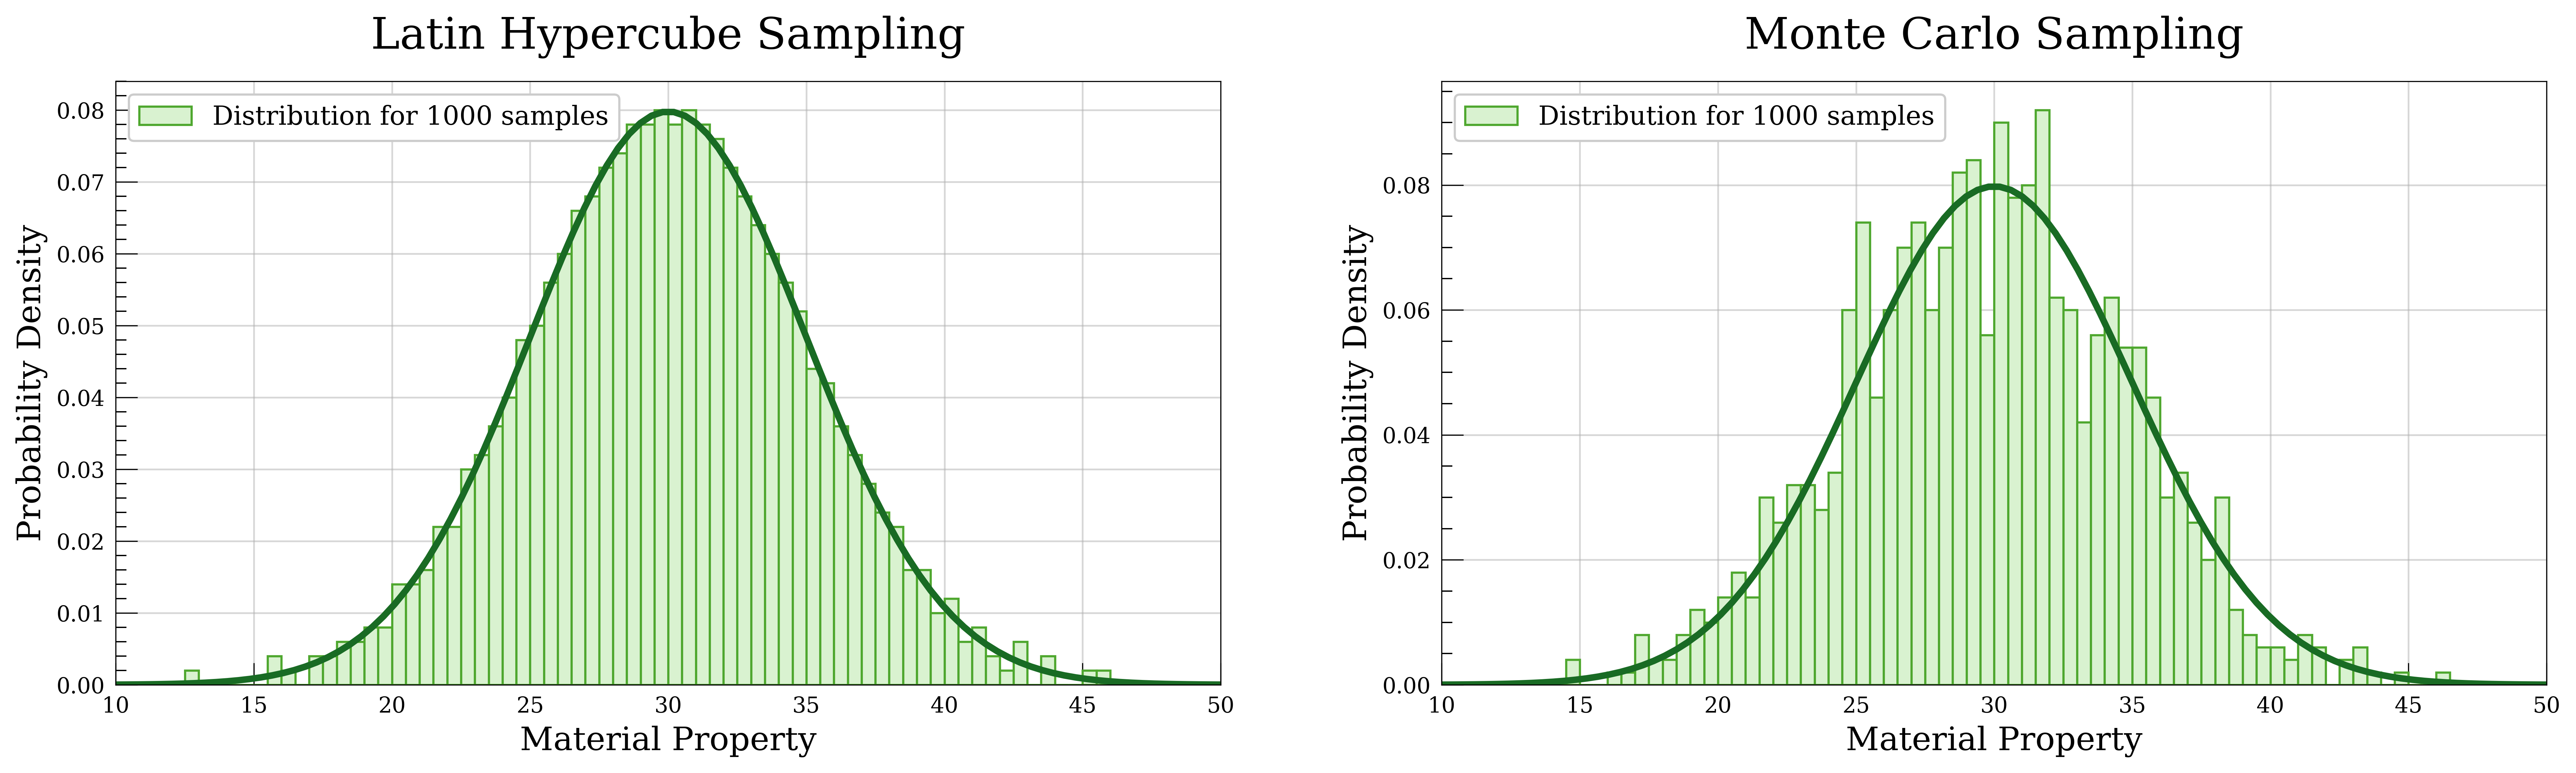

In [6]:

xmin = mean-4*std
xmax = mean+4*std
bins = int(xmax-xmin)*2
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,5),dpi=480)

ax1.hist(sample_lhc,bins=bins,color = "#D9F2D0", rwidth=1,density=True,range=(xmin,xmax),edgecolor='#4EA72E', label=f"Distribution for {sample_num} samples")
ax2.hist(sample_mc,bins=bins,color = "#D9F2D0", rwidth=1,density=True,range=(xmin,xmax),edgecolor='#4EA72E', label=f"Distribution for {sample_num} samples")

x = np.linspace(xmin, xmax, 100)
for ax in [ax1,ax2]:
    ax.plot(x, norm.pdf(x, loc=mean, scale=std), color='#196B24', lw=3)
    ax.set_xlim((xmin,xmax))
    ax.set_xlabel("Material Property", fontsize=15)
    ax.set_ylabel("Probability Density", fontsize=15)

    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis='x', direction='in', length=10 , colors='k', pad=5)
    ax.tick_params(axis='y', direction='in', length=10, colors='k', pad=5)
    ax.tick_params(axis='x', which='minor', direction='in', length=5, colors='k')
    ax.tick_params(axis='y', which='minor', direction='in', length=5, colors='k')

    ax.grid(alpha=0.5)
    ax.set_axisbelow(True)

    ax.legend(fontsize=12, framealpha=1)

ax1.set_title("Latin Hypercube Sampling", fontsize=20,pad=15)
ax2.set_title("Monte Carlo Sampling", fontsize=20,pad=15)


plt.show()

In [7]:
!pip install pygmsh

In [8]:
vertices = [(0, 0), (0, 20), (30,20), (60,40), (160,40),(160,0)] # Polygon vertices
cx = 10 # Correlation lenght in X
cy = 1 # Correlation lenght in Y
mesh_size = 2 # Triangular mesh size

In [9]:
import pygmsh

# Definir los vértices del polígono
vertices = [(0, 0), (0, 20), (30,20), (60,40), (160,40),(160,0)]

with pygmsh.geo.Geometry() as geom:
    geom.add_polygon(
        vertices,
        mesh_size=mesh_size,
    )
    mesh = geom.generate_mesh()

points = mesh.points
triangles = mesh.cells_dict['triangle']

In [10]:
n = len(points)
var = np.full((n,n),std**2)

x = points[:,0]
y = points[:,1]

cov_matrix = var*np.exp(-np.pi*(abs((x[:,None]-x[None,:]))/cx)**2)*np.exp(-np.pi*(abs((y[:,None]-y[None,:]))/cy)**2)

mean = np.full((len(points),), 30)

# values = np.random.multivariate_normal(mean, cov_matrix) , slowly method 
values = mean + np.linalg.cholesky(cov_matrix) @ np.random.standard_normal(mean.size) #fast method

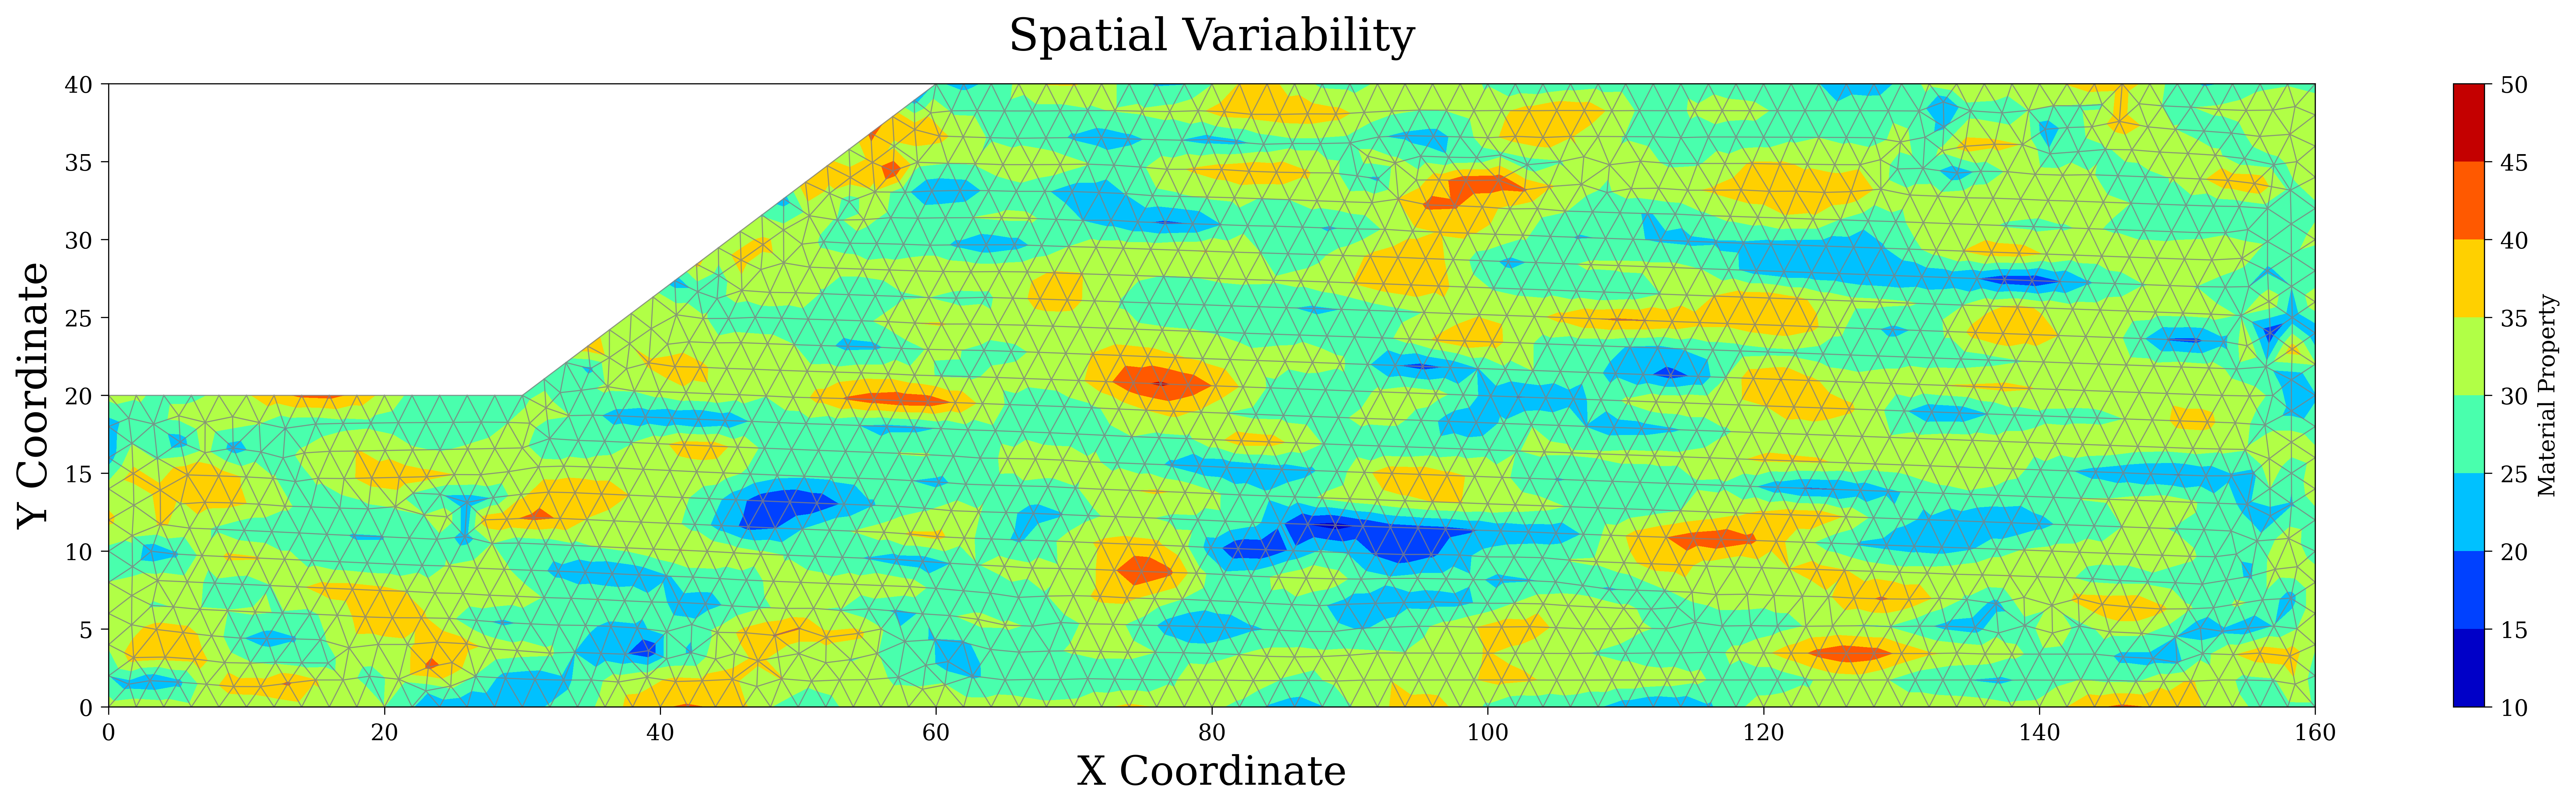

In [11]:

fig, ax = plt.subplots(figsize=(22, 5),dpi=480)

surf = ax.tricontourf(points[:, 0], points[:, 1], triangles, values, cmap='jet')
ax.triplot(points[:, 0], points[:, 1], triangles, color='gray',alpha=0.8,lw=0.5)


fig.colorbar(surf, ax=ax, orientation='vertical',label="Material Property")

ax.set_xlabel('X Coordinate',fontsize=18)
ax.set_ylabel('Y Coordinate',fontsize=18)
ax.set_title('Spatial Variability',fontsize=20,pad=15)

plt.show()